In [14]:
import numpy as np
import pandas as pd

In [15]:
data1 = pd.read_csv('rest.csv')
data2 = pd.read_csv('Webattack_combined.csv')


In [16]:
data_list1 = [data1, data2]
print('Data dimensions: ')
for i, data in enumerate(data_list1, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 1334892 rows, 78 columns
Data2 -> 810 rows, 78 columns


In [17]:
data = pd.concat(data_list1)
rows, cols = data.shape

print('New dimension set1:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension set1:
Number of rows: 1335702
Number of columns: 78
Total cells: 104184756


In [19]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          1132294
DoS              132825
Port Scan         59811
DDoS               5439
Brute Force        4443
Web Attck           810
Bot                  63
Heartbleed           11
Infiltration          6
Name: count, dtype: int64

In [20]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [21]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 126604


In [23]:
data.drop_duplicates(inplace = True)
data.shape

(1209098, 78)

In [24]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    182
dtype: int64


In [25]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      564
Flow Packets/s    746
dtype: int64


In [26]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 182
Missing values after processing infinite values: 1492


In [27]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      746
Flow Packets/s    746
dtype: int64


In [28]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s               746                        0.06
Flow Packets/s             746                        0.06


In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  4616.6450675
Median of Flow Packets/s:  127.1213373165


In [30]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27224\1818654804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27224\1818654804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [31]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [32]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate'],
      dtype='object')

In [33]:
data.shape

(1209098, 71)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
import pandas as pd
import numpy as np

# === 1. Separate features and labels ===
features = data.drop('Attack Type', axis=1)
attacks = data['Attack Type']

# === 2. Standardize the features ===
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# === 3. Apply Incremental PCA ===
size = len(features.columns) // 2  # Keep 50% of features
ipca = IncrementalPCA(n_components=size, batch_size=500)

# Train PCA incrementally on batches
for batch in np.array_split(scaled_features, max(1, len(scaled_features) // 500)):
    ipca.partial_fit(batch)

print(f'Information retained: {sum(ipca.explained_variance_ratio_):.2%}')

# === 4. Transform the scaled features ===
transformed_features = ipca.transform(scaled_features)

# === 5. Create DataFrame with PCA components and attach labels ===
new_data = pd.DataFrame(transformed_features, columns=[f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values


In [52]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          1056446
DoS               99420
Port Scan         44464
DDoS               5438
Brute Force        2440
Web Attck           810
Bot                  63
Heartbleed           11
Infiltration          6
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()

# Only keep classes with more than 10000 samples
selected_classes = class_counts[class_counts > 500]
class_names = selected_classes.index

# Keep only rows with those selected classes
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
    df = selected[selected['Attack Type'] == name]
    
    # Sample only if there are more than 10000 records
    if len(df) > 1500:
        df = df.sample(n=1500, random_state=0)
    
    dfs.append(df)

# Combine all sampled data
df = pd.concat(dfs, ignore_index=True)

df.drop(df[df["Attack Type"] == "Brute Force"].index, inplace=True)

# Show the final class distribution
df['Attack Type'].value_counts()
new_data.rename(columns={'Attack Type': 'Prediction'}, inplace=True)

# Save to FP.csv
output_path = "Model/FP.csv"
df.to_csv(output_path, index=False)
print(f"[INFO] Saved processed dataset to {output_path}")

Prediction
BENIGN       1500
DoS          1500
Port Scan    1500
DDoS         1500
Web Attck     810
Name: count, dtype: int64
[INFO] Saved processed dataset to Model/FP.csv


In [38]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Web Attck    1500
BENIGN       1500
DDoS         1500
Port Scan    1500
DoS          1500
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split


features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [43]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# === Simulate new incremental batch ===
X_train, X_train_new, y_train, y_train_new = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# === Label Encoding ===
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_new_encoded = le.transform(y_train_new)

# === DMatrix ===
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtrain_new = xgb.DMatrix(X_train_new, label=y_train_new_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)


In [44]:
# === Parameters ===
params = {
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'max_depth': 5,
    'eta': 0.2,
    'gamma': 0,
    'colsample_bytree': 0.85,
    'subsample': 1,
    'min_child_weight': 1,
    'eval_metric': 'mlogloss',
    'seed': 0
}

# === Train old model ===
bst_old = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train')]
)

# === 1. Evaluate old model on the new data (without training on it) ===
y_pred_old_on_new = bst_old.predict(dtrain_new).astype(int)
acc_old_on_new = accuracy_score(y_train_new_encoded, y_pred_old_on_new)
print("Old Model Accuracy on New Data (no training):", acc_old_on_new)
print(classification_report(y_train_new_encoded, y_pred_old_on_new, target_names=le.classes_))

# === 2. Incrementally train the old model on the new data ===
bst_new = xgb.train(
    params=params,
    dtrain=dtrain_new,
    num_boost_round=100,
    evals=[(dtrain_new, 'train')],
    xgb_model=bst_old  # continue from old model
)

[0]	train-mlogloss:1.16419
[1]	train-mlogloss:0.89652
[2]	train-mlogloss:0.70836
[3]	train-mlogloss:0.56808
[4]	train-mlogloss:0.45987
[5]	train-mlogloss:0.37456
[6]	train-mlogloss:0.30607
[7]	train-mlogloss:0.25141
[8]	train-mlogloss:0.20713
[9]	train-mlogloss:0.17184
[10]	train-mlogloss:0.14297
[11]	train-mlogloss:0.11879
[12]	train-mlogloss:0.09875
[13]	train-mlogloss:0.08279
[14]	train-mlogloss:0.06919
[15]	train-mlogloss:0.05812
[16]	train-mlogloss:0.04909
[17]	train-mlogloss:0.04149
[18]	train-mlogloss:0.03520
[19]	train-mlogloss:0.03014
[20]	train-mlogloss:0.02594
[21]	train-mlogloss:0.02234
[22]	train-mlogloss:0.01940
[23]	train-mlogloss:0.01687
[24]	train-mlogloss:0.01476
[25]	train-mlogloss:0.01292
[26]	train-mlogloss:0.01135
[27]	train-mlogloss:0.01002
[28]	train-mlogloss:0.00892
[29]	train-mlogloss:0.00802
[30]	train-mlogloss:0.00716
[31]	train-mlogloss:0.00651
[32]	train-mlogloss:0.00590
[33]	train-mlogloss:0.00533
[34]	train-mlogloss:0.00487
[35]	train-mlogloss:0.00448
[3

In [45]:
# === Evaluate incrementally trained model on the same test set ===
y_pred_new_on_test = bst_new.predict(dtest).astype(int)
acc_new_on_test = accuracy_score(y_test_encoded, y_pred_new_on_test)
print("New Model Accuracy on Test Data (after incremental training):", acc_new_on_test)
print(classification_report(y_test_encoded, y_pred_new_on_test, target_names=le.classes_))

# === Comparison Summary ===
print("--------------------------------------------------")
print(f"Old model on new data (without training): {acc_old_on_new:.4f}")
print(f"Incrementally trained model on test set: {acc_new_on_test:.4f}")

New Model Accuracy on Test Data (after incremental training): 0.9898666666666667
              precision    recall  f1-score   support

      BENIGN       0.97      0.98      0.98       367
        DDoS       1.00      1.00      1.00       419
         DoS       0.98      0.99      0.98       358
   Port Scan       1.00      0.98      0.99       387
   Web Attck       1.00      1.00      1.00       344

    accuracy                           0.99      1875
   macro avg       0.99      0.99      0.99      1875
weighted avg       0.99      0.99      0.99      1875

--------------------------------------------------
Old model on new data (without training): 0.9929
Incrementally trained model on test set: 0.9899


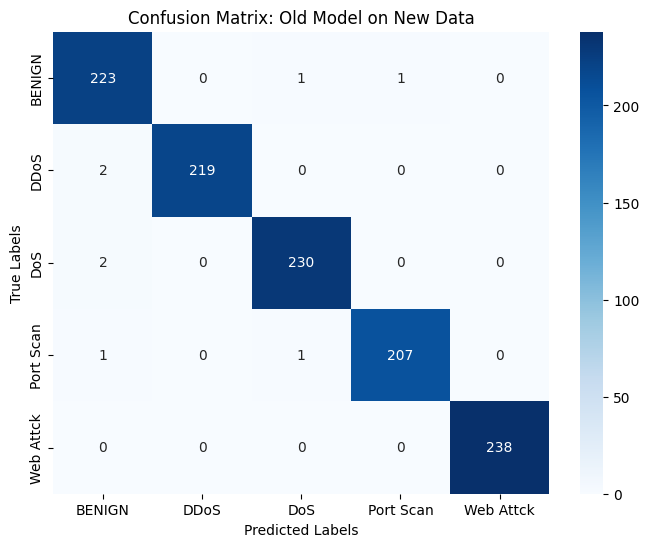

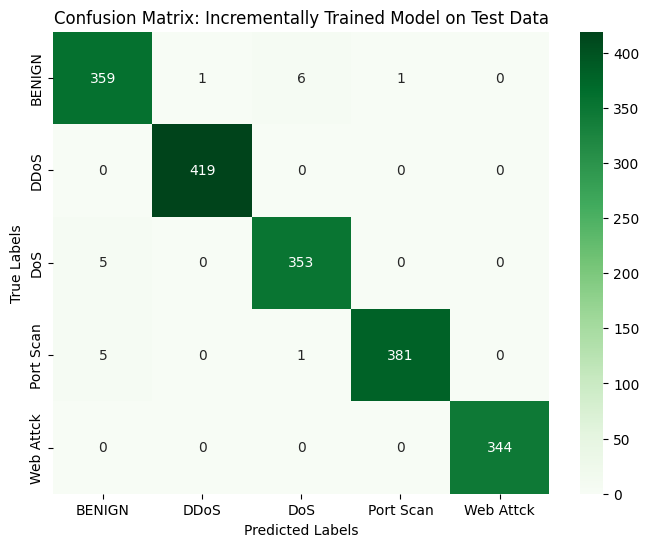

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Confusion Matrix: Old Model on New Data ===
cm_old = confusion_matrix(y_train_new_encoded, y_pred_old_on_new)
plt.figure(figsize=(8,6))
sns.heatmap(cm_old, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix: Old Model on New Data")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

# === Confusion Matrix: Incrementally Trained Model on Test Set ===
cm_new = confusion_matrix(y_test_encoded, y_pred_new_on_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm_new, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Greens")
plt.title("Confusion Matrix: Incrementally Trained Model on Test Data")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


In [48]:
import joblib


joblib.dump(bst_new, "xgb_incremental_model.joblib")
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(ipca, 'pca.joblib')


['pca.joblib']